In [3]:
import pandas as pd

data = pd.read_csv("googleplaystore.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
def rule_based_labeling(row):
    if row["Rating"] >= 4:
        return "High"
    elif 2 <= row['Rating'] < 4:
        return "Medium"
    else:
        return "Low"

In [8]:
data["Rating_Cat"] = data.apply(rule_based_labeling, axis=1)

In [9]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


<Axes: >

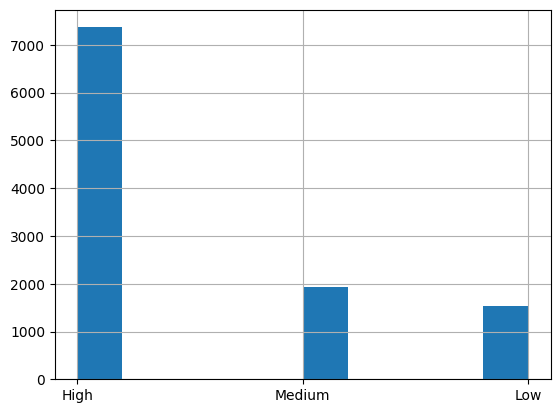

In [10]:
data["Rating_Cat"].hist()

Разметка подмножества данных с помощью Label Studio

In [12]:
data = pd.read_csv("tweets.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")

In [13]:
subset = data.sample(frac=0.01)

In [14]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [16]:
subset.to_csv("part_tweets.csv", index=False)

### Задание 3

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

In [60]:
movie = pd.read_csv("movie.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")

In [61]:
movie.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


array([[<Axes: title={'center': 'label'}>]], dtype=object)

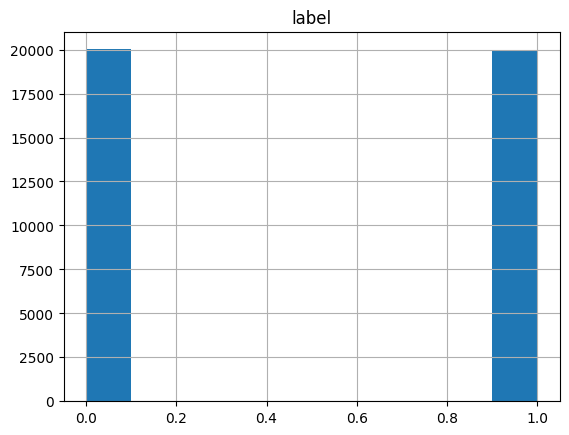

In [62]:
movie.hist('label')

In [63]:
labeled_marks, unlabeled_marks = train_test_split(movie, train_size = 0.2)

In [64]:
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['text'])
    y = labeled_data['label']
    model = LogisticRegression()
    model.fit(x,y) 
    return model, vect

model, vect = train_model(labeled_marks)

In [65]:
x_unlabeled = vect.transform(unlabeled_marks['text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [66]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainly = -(y_unlabeled_proba*np.log(y_unlabeled_proba)).sum(axis=1)

In [67]:
uncertainly

array([0.42451027, 0.68617024, 0.57681464, ..., 0.18019735, 0.44716613,
       0.69301183])

In [68]:
labeled_new = unlabeled_marks.iloc[uncertainly.argsort()[:100]]
unlabeled_new = unlabeled_marks.iloc[uncertainly.argsort()[100:]]

In [69]:
labeled_new

,text,label
27881,"I would have given it a one instead of a two, ...",0
28555,"When I rented this I was hoping for what ""Reig...",0
19780,This movie was a complete waste of time. The s...,0
7604,This is just the same old crap that is spewed ...,0
16702,this is the only movie i have ever walked out ...,0
...,...,...
11930,I sometimes enjoy really lousy movies....those...,0
35140,I read the reviews before i watched this movie...,0
37085,Most awful casting I've ever seen. Clark Kent ...,0
30059,I understand that the budget was low on this f...,0


In [70]:
unlabeled_new

,text,label
10766,"What to say about ""Dead End Road""...<br /><br ...",0
27136,I am a fan of his ... This movie sucked really...,0
36758,This movie has everything that makes a bad mov...,1
37137,"Am I wrong,or is the 2007 version just a rip-o...",0
1581,If you are ever in the mood for a truly terrib...,0
...,...,...
30827,(WARNING - CONTAINS MILD SPOILER) A movie almo...,1
12886,Essentially plotless action film has two good ...,0
13721,Rivalry between brothers leads to main story l...,0
36337,"It seems like an exciting prospect, a modern-d...",0


In [46]:
labeled_marks = pd.concat([labeled_marks, labeled_new])

In [71]:
model, vect = train_model(labeled_marks)

In [51]:
reviews_test = unlabeled_marks

In [53]:
x_test = vect.transform(reviews_test["text"])

In [54]:
y_test_predicted = model.predict(x_test)

In [55]:
f1 = f1_score(reviews_test['label'], y_test_predicted)

In [56]:
f1

np.float64(0.8703942124946356)